In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 13

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 13)                143       
                                                                 
Total params: 1,213
Trainable params: 1,213
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
26/34 [=====================>........] - ETA: 0s - loss: 2.5471 - accuracy: 0.1893
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 2s 20ms/step - loss: 2.5230 - accuracy: 0.1990 - val_loss: 2.3967 - val_accuracy: 0.2763
Epoch 2/1000
26/34 [=====================>........] - ETA: 0s - loss: 2.3456 - accuracy: 0.2659
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 8ms/step - loss: 2.3215 - accuracy: 0.2709 - val_loss: 2.1741 - val_accuracy: 0.2806
Epoch 3/1000
27/34 [======================>.......] - ETA: 0s - loss: 2.1074 - accuracy: 0.2934
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 8ms/step - loss: 2.0841 - accuracy: 0.2930 - val_loss: 1.8828 - val_accuracy: 0.2947
Epoch 4/1000
28/34 [=======================>......] - ETA: 0s - loss: 1.8586 - accuracy: 0.3131


23/34 [===================>..........] - ETA: 0s - loss: 1.0204 - accuracy: 0.6202
Epoch 28: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 8ms/step - loss: 1.0214 - accuracy: 0.6179 - val_loss: 0.6568 - val_accuracy: 0.8537
Epoch 29/1000
30/34 [=========================>....] - ETA: 0s - loss: 0.9693 - accuracy: 0.6484
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 7ms/step - loss: 0.9830 - accuracy: 0.6426 - val_loss: 0.6429 - val_accuracy: 0.8523
Epoch 30/1000
32/34 [===========================>..] - ETA: 0s - loss: 0.9979 - accuracy: 0.6331
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 7ms/step - loss: 0.9980 - accuracy: 0.6325 - val_loss: 0.6306 - val_accuracy: 0.8509
Epoch 31/1000
31/34 [==========================>...] - ETA: 0s - loss: 0.9909 - accuracy: 0.6200
Epoch 31

30/34 [=========================>....] - ETA: 0s - loss: 0.8480 - accuracy: 0.6820
Epoch 55: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 7ms/step - loss: 0.8467 - accuracy: 0.6834 - val_loss: 0.4681 - val_accuracy: 0.8940
Epoch 56/1000
30/34 [=========================>....] - ETA: 0s - loss: 0.8461 - accuracy: 0.6883
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 7ms/step - loss: 0.8442 - accuracy: 0.6886 - val_loss: 0.4632 - val_accuracy: 0.9102
Epoch 57/1000
32/34 [===========================>..] - ETA: 0s - loss: 0.8421 - accuracy: 0.6843
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 7ms/step - loss: 0.8413 - accuracy: 0.6832 - val_loss: 0.4549 - val_accuracy: 0.9088
Epoch 58/1000
23/34 [===================>..........] - ETA: 0s - loss: 0.8490 - accuracy: 0.6929
Epoch 58

30/34 [=========================>....] - ETA: 0s - loss: 0.7750 - accuracy: 0.7096
Epoch 82: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 8ms/step - loss: 0.7787 - accuracy: 0.7067 - val_loss: 0.3947 - val_accuracy: 0.9371
Epoch 83/1000
32/34 [===========================>..] - ETA: 0s - loss: 0.8000 - accuracy: 0.7102
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 7ms/step - loss: 0.7971 - accuracy: 0.7105 - val_loss: 0.4008 - val_accuracy: 0.9336
Epoch 84/1000
29/34 [========================>.....] - ETA: 0s - loss: 0.7607 - accuracy: 0.7244
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 7ms/step - loss: 0.7681 - accuracy: 0.7199 - val_loss: 0.3916 - val_accuracy: 0.9371
Epoch 85/1000
24/34 [====================>.........] - ETA: 0s - loss: 0.7770 - accuracy: 0.7194
Epoch 85

28/34 [=======================>......] - ETA: 0s - loss: 0.7248 - accuracy: 0.7344
Epoch 109: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 8ms/step - loss: 0.7285 - accuracy: 0.7320 - val_loss: 0.3632 - val_accuracy: 0.9364
Epoch 110/1000
31/34 [==========================>...] - ETA: 0s - loss: 0.7393 - accuracy: 0.7341
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 7ms/step - loss: 0.7435 - accuracy: 0.7336 - val_loss: 0.3709 - val_accuracy: 0.9364
Epoch 111/1000
31/34 [==========================>...] - ETA: 0s - loss: 0.7303 - accuracy: 0.7394
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 11ms/step - loss: 0.7266 - accuracy: 0.7393 - val_loss: 0.3636 - val_accuracy: 0.9364
Epoch 112/1000
31/34 [==========================>...] - ETA: 0s - loss: 0.7528 - accuracy: 0.7319
E

Epoch 136/1000
32/34 [===========================>..] - ETA: 0s - loss: 0.7169 - accuracy: 0.7327
Epoch 136: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 7ms/step - loss: 0.7092 - accuracy: 0.7364 - val_loss: 0.3460 - val_accuracy: 0.9463
Epoch 137/1000
29/34 [========================>.....] - ETA: 0s - loss: 0.7205 - accuracy: 0.7403
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 8ms/step - loss: 0.7135 - accuracy: 0.7419 - val_loss: 0.3532 - val_accuracy: 0.9399
Epoch 138/1000
31/34 [==========================>...] - ETA: 0s - loss: 0.7148 - accuracy: 0.7417
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 9ms/step - loss: 0.7212 - accuracy: 0.7379 - val_loss: 0.3534 - val_accuracy: 0.9399
Epoch 139/1000
30/34 [=========================>....] - ETA: 0s - loss: 0.7010 - accu

Epoch 163/1000
23/34 [===================>..........] - ETA: 0s - loss: 0.6981 - accuracy: 0.7381
Epoch 163: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 9ms/step - loss: 0.6884 - accuracy: 0.7473 - val_loss: 0.3347 - val_accuracy: 0.9456
Epoch 164/1000
25/34 [=====================>........] - ETA: 0s - loss: 0.6961 - accuracy: 0.7519
Epoch 164: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 8ms/step - loss: 0.6962 - accuracy: 0.7522 - val_loss: 0.3457 - val_accuracy: 0.9350
Epoch 165/1000
27/34 [======================>.......] - ETA: 0s - loss: 0.7015 - accuracy: 0.7497
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 8ms/step - loss: 0.6997 - accuracy: 0.7480 - val_loss: 0.3323 - val_accuracy: 0.9435
Epoch 166/1000
24/34 [====================>.........] - ETA: 0s - loss: 0.6824 - accu

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

12/12 [==============================] - 0s 4ms/step - loss: 0.3467 - accuracy: 0.9399


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 200ms/step
[3.63596044e-02 5.55523336e-02 7.30301082e-01 1.03468185e-04
 1.68427959e-01 3.45917715e-06 8.93194738e-06 2.64551068e-06
 1.21950552e-06 1.45798481e-06 3.37359938e-03 5.85729815e-03
 6.75962792e-06]
2


# Confusion matrix

45/45 [==============================] - 0s 3ms/step


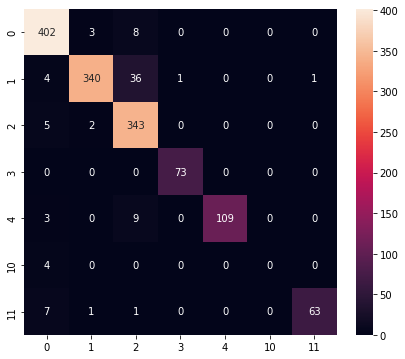

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       413
           1       0.98      0.89      0.93       382
           2       0.86      0.98      0.92       350
           3       0.99      1.00      0.99        73
           4       1.00      0.90      0.95       121
          10       0.00      0.00      0.00         4
          11       0.98      0.88      0.93        72

    accuracy                           0.94      1415
   macro avg       0.82      0.80      0.81      1415
weighted avg       0.94      0.94      0.94      1415



C:\Users\HP\anaconda3\envs\PML\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\envs\PML\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\envs\PML\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmp1hvvc5l0\assets


6884

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[3.6359616e-02 5.5552356e-02 7.3030108e-01 1.0346817e-04 1.6842800e-01
 3.4591772e-06 8.9319465e-06 2.6455082e-06 1.2195042e-06 1.4579847e-06
 3.3736005e-03 5.8572982e-03 6.7596279e-06]
2
